In [31]:
%matplotlib inline 

In [41]:
import pandas
import matplotlib.pyplot as plt 
from sklearn import preprocessing, cross_validation, ensemble, pipeline, svm, decomposition
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report, roc_curve

In [33]:
df = pandas.read_csv( 'feature_sets/expression.csv', index_col=0 )

scl = preprocessing.RobustScaler()
X = scl.fit_transform( df.ix[:,:-1] )
y = df.ix[:,-1:].as_matrix().ravel()

In [34]:
print X.shape
print y.shape 

(126, 47)
(126,)


(array([ 43.,  83.]), array([ 0. ,  0.5,  1. ]), <a list of 2 Patch objects>)

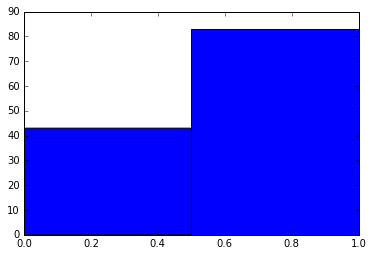

In [116]:
# unbalanced classes 
plt.hist( y, bins=2 )

# Tuning hyper-parameters for precision
{'kernel': 'rbf', 'C': 0.3, 'gamma': 0.001, 'class_weight': 'balanced'}
0.171 (+/-0.200) for {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.001, 'class_weight': 'balanced'}
0.171 (+/-0.200) for {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.0001, 'class_weight': 'balanced'}
0.541 (+/-0.322) for {'kernel': 'rbf', 'C': 0.3, 'gamma': 0.001, 'class_weight': 'balanced'}
0.479 (+/-0.244) for {'kernel': 'rbf', 'C': 0.3, 'gamma': 0.0001, 'class_weight': 'balanced'}
0.494 (+/-0.295) for {'kernel': 'rbf', 'C': 3, 'gamma': 0.001, 'class_weight': 'balanced'}
0.526 (+/-0.347) for {'kernel': 'rbf', 'C': 3, 'gamma': 0.0001, 'class_weight': 'balanced'}
0.451 (+/-0.358) for {'kernel': 'rbf', 'C': 30, 'gamma': 0.001, 'class_weight': 'balanced'}
0.495 (+/-0.299) for {'kernel': 'rbf', 'C': 30, 'gamma': 0.0001, 'class_weight': 'balanced'}
0.516 (+/-0.390) for {'kernel': 'linear', 'C': 0.1, 'class_weight': 'balanced'}
0.443 (+/-0.412) for {'kernel': 'linear', 'C': 0.3, 'class_weight'

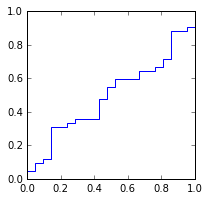

# Tuning hyper-parameters for recall
{'kernel': 'rbf', 'C': 0.3, 'gamma': 0.001, 'class_weight': 'balanced'}
0.397 (+/-0.213) for {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.001, 'class_weight': 'balanced'}
0.397 (+/-0.213) for {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.0001, 'class_weight': 'balanced'}
0.667 (+/-0.169) for {'kernel': 'rbf', 'C': 0.3, 'gamma': 0.001, 'class_weight': 'balanced'}
0.667 (+/-0.080) for {'kernel': 'rbf', 'C': 0.3, 'gamma': 0.0001, 'class_weight': 'balanced'}
0.587 (+/-0.207) for {'kernel': 'rbf', 'C': 3, 'gamma': 0.001, 'class_weight': 'balanced'}
0.667 (+/-0.194) for {'kernel': 'rbf', 'C': 3, 'gamma': 0.0001, 'class_weight': 'balanced'}
0.508 (+/-0.344) for {'kernel': 'rbf', 'C': 30, 'gamma': 0.001, 'class_weight': 'balanced'}
0.603 (+/-0.209) for {'kernel': 'rbf', 'C': 30, 'gamma': 0.0001, 'class_weight': 'balanced'}
0.524 (+/-0.316) for {'kernel': 'linear', 'C': 0.1, 'class_weight': 'balanced'}
0.460 (+/-0.359) for {'kernel': 'linear', 'C': 0.3, 'class_weight': '

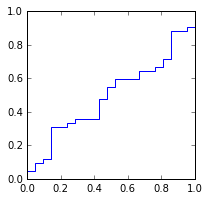

In [69]:
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.5)

# Set the parameters by cross-validation
tuned_parameters = [
    { 
        'kernel': [ 'rbf' ], 
        'gamma': [ 1e-3, 1e-4 ],
        'C': [ .1, .3, 3, 30 ],  
        'class_weight': [ 'balanced' ], 
    },
    {
        'kernel': ['linear'], 
        'C': [ .1, .3, 3, 30 ],
        'class_weight': [ 'balanced' ], 
    }
]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    
    svc = SVC()
    clf = GridSearchCV(svc, tuned_parameters, cv=10, scoring='%s_weighted' % score)
    clf.fit(X_train, y_train)

    print clf.best_params_ 
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() * 2, params))

    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    y_desc = clf.decision_function(X_test) 
    tpr, fpr, __ = roc_curve( y_true, y_desc ) 
    plt.figure( figsize=( 3,3 ) ) 
    plt.plot( tpr, fpr ) 
    plt.show()

In [119]:
# same as above but with random forest classifier 

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
param_grid = [
    { 
        'rf__criterion': [ 'entropy', 'gini' ], 
        'rf__n_estimators': [ 10 ], 
        'rf__max_features': [ 'sqrt', None ], 
        'rf__max_depth': [ 2, 5, 10 ], 
        'rf__class_weight': [ 'balanced_subsample' ], 
    },
]
  
pln = pipeline.Pipeline([
    ( 'rf', ensemble.RandomForestClassifier() ),
])

clf = GridSearchCV( pln, param_grid, cv=10 )
clf.fit( X_train, y_train )

print("Best parameters found on training set")
print(clf.best_params_)

print("Grid scores on training set")
for params, mean_score, scores in clf.grid_scores_:
    print("%0.3f (±%0.03f) for %r" % (mean_score, scores.std() * 2, params))

print("Detailed classification report")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

y_desc = clf.best_estimator_.named_steps['rf'].predict_proba( X )
print y_desc

[ x for x in y_desc ] 

# tpr, fpr, __ = roc_curve( y_true, y_desc ) 
# plt.figure( figsize=( 3,3 ) ) 
# plt.plot( tpr, fpr ) 
# plt.show()

Best parameters found on training set
{'rf__n_estimators': 10, 'rf__criterion': 'gini', 'rf__max_depth': 10, 'rf__class_weight': 'balanced_subsample', 'rf__max_features': 'sqrt'}
Grid scores on training set
0.651 (±0.389) for {'rf__n_estimators': 10, 'rf__criterion': 'entropy', 'rf__max_depth': 2, 'rf__class_weight': 'balanced_subsample', 'rf__max_features': 'sqrt'}
0.651 (±0.421) for {'rf__n_estimators': 10, 'rf__criterion': 'entropy', 'rf__max_depth': 2, 'rf__class_weight': 'balanced_subsample', 'rf__max_features': None}
0.667 (±0.499) for {'rf__n_estimators': 10, 'rf__criterion': 'entropy', 'rf__max_depth': 5, 'rf__class_weight': 'balanced_subsample', 'rf__max_features': 'sqrt'}
0.587 (±0.445) for {'rf__n_estimators': 10, 'rf__criterion': 'entropy', 'rf__max_depth': 5, 'rf__class_weight': 'balanced_subsample', 'rf__max_features': None}
0.571 (±0.259) for {'rf__n_estimators': 10, 'rf__criterion': 'entropy', 'rf__max_depth': 10, 'rf__class_weight': 'balanced_subsample', 'rf__max_featu

In [113]:
feat_import = clf.best_estimator_.named_steps['rf'].feature_importances_
w = pandas.DataFrame( zip( df.columns[:-1], feat_import ), columns=['feature','importance'] )
w.set_index( 'feature', inplace=True ) 
w.sort_values( by='importance', ascending=False )

,importance
feature,
SR_5_hbond_sc,0.101773
SR_4_nlpstat_pm,0.100526
total_score,0.078847
SR_2_pstat_pm,0.062468
SR_5_interf_E_1_2,0.037447
SR_4_fa_rep,0.035856
SR_1_nlpstat_pm,0.033925
SR_5_total_score,0.032876
hbond_sc,0.030058


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

param_grid = [
    { 
        'svm__n_estimators': [ 10 ], 
        'svm__class_weight': [ 'balanced_subsample' ], 
    },
]
  
pln = pipeline.Pipeline([
    ( 'svm', ensemble.RandomForestClassifier() ),
])

clf = GridSearchCV( pln, param_grid, cv=10 )
clf.fit( X_train, y_train )


print 'Baest parameters found'
print clf.best_params_ 

print 'Grid scores on training set'
for params, mean_score, scores in clf.grid_scores_:
    print '%0.3f (±%0.03f) for %r' % (mean_score, scores.std() * 2, params)

print("Detailed classification report")
print 
print("The model is trained on the full training set")
print("The scores are computed on test set")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#y_desc = clf.decision_function(X_test) 
    #tpr, fpr, __ = roc_curve( y_true, y_desc ) 
    #plt.figure( figsize=( 3,3 ) ) 
    #plt.plot( tpr, fpr ) 
    #plt.show()

Best parameters found
{'svm__class_weight': 'balanced_subsample', 'svm__n_estimators': 10}
Grid scores on training set
0.444 (±0.448) for {'svm__class_weight': 'balanced_subsample', 'svm__n_estimators': 10}
Detailed classification report

The model is trained on the full training set
The scores are computed on test set
             precision    recall  f1-score   support

          0       0.37      0.50      0.43        20
          1       0.72      0.60      0.66        43

avg / total       0.61      0.57      0.58        63



# Tuning hyper-parameters for precision
Best parameters set found on development set:
{'svm__C': 0.1, 'svm__class_weight': 'balanced', 'svm__kernel': 'linear'}

Grid scores on development set:

0.183 (+/-0.197) for {'svm__C': 0.1, 'svm__class_weight': 'balanced', 'svm__kernel': 'rbf', 'svm__gamma': 0.001}
0.183 (+/-0.197) for {'svm__C': 0.1, 'svm__class_weight': 'balanced', 'svm__kernel': 'rbf', 'svm__gamma': 0.0001}
0.183 (+/-0.197) for {'svm__C': 0.3, 'svm__class_weight': 'balanced', 'svm__kernel': 'rbf', 'svm__gamma': 0.001}
0.183 (+/-0.197) for {'svm__C': 0.3, 'svm__class_weight': 'balanced', 'svm__kernel': 'rbf', 'svm__gamma': 0.0001}
0.307 (+/-0.449) for {'svm__C': 3, 'svm__class_weight': 'balanced', 'svm__kernel': 'rbf', 'svm__gamma': 0.001}
0.147 (+/-0.111) for {'svm__C': 3, 'svm__class_weight': 'balanced', 'svm__kernel': 'rbf', 'svm__gamma': 0.0001}
0.434 (+/-0.338) for {'svm__C': 30, 'svm__class_weight': 'balanced', 'svm__kernel': 'rbf', 'svm__gamma': 0.001}
0.353 (+/-0.395) 

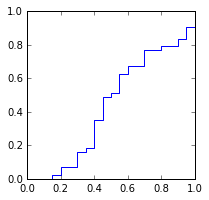

# Tuning hyper-parameters for recall
Best parameters set found on development set:
{'svm__C': 30, 'svm__class_weight': 'balanced', 'svm__kernel': 'linear'}

Grid scores on development set:

0.413 (+/-0.218) for {'svm__C': 0.1, 'svm__class_weight': 'balanced', 'svm__kernel': 'rbf', 'svm__gamma': 0.001}
0.413 (+/-0.218) for {'svm__C': 0.1, 'svm__class_weight': 'balanced', 'svm__kernel': 'rbf', 'svm__gamma': 0.0001}
0.413 (+/-0.218) for {'svm__C': 0.3, 'svm__class_weight': 'balanced', 'svm__kernel': 'rbf', 'svm__gamma': 0.001}
0.413 (+/-0.218) for {'svm__C': 0.3, 'svm__class_weight': 'balanced', 'svm__kernel': 'rbf', 'svm__gamma': 0.0001}
0.333 (+/-0.428) for {'svm__C': 3, 'svm__class_weight': 'balanced', 'svm__kernel': 'rbf', 'svm__gamma': 0.001}
0.365 (+/-0.087) for {'svm__C': 3, 'svm__class_weight': 'balanced', 'svm__kernel': 'rbf', 'svm__gamma': 0.0001}
0.397 (+/-0.267) for {'svm__C': 30, 'svm__class_weight': 'balanced', 'svm__kernel': 'rbf', 'svm__gamma': 0.001}
0.397 (+/-0.378) for 

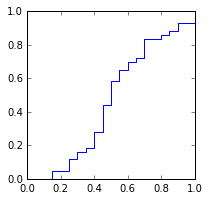

In [46]:
# SVM with 10-fold cross validation 
# 50:50 test:train split 

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.5)

# Set the parameters by cross-validation
tuned_parameters = [
    { 
        'svm__kernel': [ 'rbf' ], 
        'svm__gamma': [ 1e-3, 1e-4 ],
        'svm__C': [ .1, .3, 3, 30 ],  
        'svm__class_weight': [ 'balanced' ], 
    },
    {
        'svm__kernel': ['linear'], 
        'svm__C': [ .1, .3, 3, 30 ],
        'svm__class_weight': [ 'balanced' ], 
    }
]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
        
    pln = pipeline.Pipeline([
        ( 'svm', svm.SVC() ),
    ])

    clf = GridSearchCV(pln, tuned_parameters, cv=10, scoring='%s_weighted' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")

    print(clf.best_params_)
    print 
    print("Grid scores on development set:")
    print 
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() * 2, params))
    print 

    print("Detailed classification report:")
    print 
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print 
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    y_desc = clf.decision_function(X_test) 
    tpr, fpr, __ = roc_curve( y_true, y_desc ) 
    plt.figure( figsize=( 3,3 ) ) 
    plt.plot( tpr, fpr ) 
    plt.show()

# Tuning hyper-parameters for precision
Best parameters set found on development set:
{'svm__C': 30, 'pca__n_components': 10, 'svm__class_weight': 'balanced', 'pca__whiten': True, 'svm__gamma': 0.001, 'svm__kernel': 'rbf'}

Grid scores on development set:

0.412 (+/-0.209) for {'svm__C': 0.1, 'pca__n_components': 2, 'svm__class_weight': 'balanced', 'pca__whiten': True, 'svm__gamma': 0.001, 'svm__kernel': 'rbf'}
0.412 (+/-0.209) for {'svm__C': 0.1, 'pca__n_components': 2, 'svm__class_weight': 'balanced', 'pca__whiten': True, 'svm__gamma': 0.0001, 'svm__kernel': 'rbf'}
0.164 (+/-0.240) for {'svm__C': 0.3, 'pca__n_components': 2, 'svm__class_weight': 'balanced', 'pca__whiten': True, 'svm__gamma': 0.001, 'svm__kernel': 'rbf'}
0.164 (+/-0.240) for {'svm__C': 0.3, 'pca__n_components': 2, 'svm__class_weight': 'balanced', 'pca__whiten': True, 'svm__gamma': 0.0001, 'svm__kernel': 'rbf'}
0.164 (+/-0.240) for {'svm__C': 3, 'pca__n_components': 2, 'svm__class_weight': 'balanced', 'pca__whiten': Tr

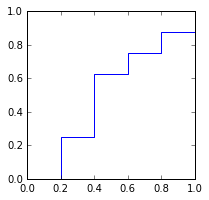

# Tuning hyper-parameters for recall
Best parameters set found on development set:
{'svm__C': 0.1, 'pca__n_components': 10, 'svm__class_weight': 'balanced', 'pca__whiten': True, 'svm__gamma': 0.0001, 'svm__kernel': 'rbf'}

Grid scores on development set:

0.628 (+/-0.240) for {'svm__C': 0.1, 'pca__n_components': 2, 'svm__class_weight': 'balanced', 'pca__whiten': True, 'svm__gamma': 0.001, 'svm__kernel': 'rbf'}
0.628 (+/-0.240) for {'svm__C': 0.1, 'pca__n_components': 2, 'svm__class_weight': 'balanced', 'pca__whiten': True, 'svm__gamma': 0.0001, 'svm__kernel': 'rbf'}
0.381 (+/-0.258) for {'svm__C': 0.3, 'pca__n_components': 2, 'svm__class_weight': 'balanced', 'pca__whiten': True, 'svm__gamma': 0.001, 'svm__kernel': 'rbf'}
0.381 (+/-0.258) for {'svm__C': 0.3, 'pca__n_components': 2, 'svm__class_weight': 'balanced', 'pca__whiten': True, 'svm__gamma': 0.0001, 'svm__kernel': 'rbf'}
0.381 (+/-0.258) for {'svm__C': 3, 'pca__n_components': 2, 'svm__class_weight': 'balanced', 'pca__whiten': Tru

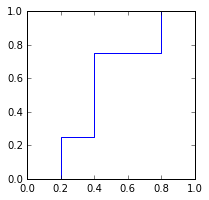

In [51]:
# SVM with 10-fold cross validation 
# 50:50 test:train split 

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.1)

param_grid = [
    { 
        'svm__kernel': [ 'rbf' ], 
        'svm__gamma': [ 1e-3, 1e-4 ],
        'svm__C': [ .1, .3, 3, 30 ],  
        'svm__class_weight': [ 'balanced' ],
        'pca__n_components': [ 2, 5, 10, 20 ], 
        'pca__whiten': [ True ], 
    },
    {
        'svm__kernel': ['linear'], 
        'svm__C': [ .1, .3, 3, 30 ],
        'svm__class_weight': [ 'balanced' ],
        'pca__n_components': [ 2, 5, 10, 20 ], 
    }
]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
        
    pln = pipeline.Pipeline([
        ( 'pca', decomposition.PCA() ), 
        ( 'svm', svm.SVC() ),
    ])

    clf = GridSearchCV(pln, param_grid, cv=10, scoring='%s_weighted' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")

    print(clf.best_params_)
    print 
    print("Grid scores on development set:")
    print 
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() * 2, params))
    print 

    print("Detailed classification report:")
    print 
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print 
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    y_desc = clf.decision_function(X_test) 
    tpr, fpr, __ = roc_curve( y_true, y_desc ) 
    plt.figure( figsize=( 3,3 ) ) 
    plt.plot( tpr, fpr ) 
    plt.show()

In [120]:
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
# load the iris datasets
#dataset = datasets.load_iris()
# fit a logistic regression model to the data
model = LogisticRegression()
model.fit(X_train, y_train)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
             precision    recall  f1-score   support

          0       0.25      0.35      0.29        20
          1       0.63      0.51      0.56        43

avg / total       0.51      0.46      0.48        63

[[ 7 13]
 [21 22]]
